In [1]:
import os
import pyreadr
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from yellowbrick.regressor import ResidualsPlot
from mlxtend.feature_selection import SequentialFeatureSelector
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
os.getcwd()

'C:\\Users\\sachin.rajendran\\Downloads\\DS\\Springboard\\DS Springboard Facilitator Toolkit-20211224T051245Z-001\\DS Springboard Facilitator Toolkit\\2. Linear Regression\\In Session Assignment\\Code'

In [3]:
os.chdir("..")
os.getcwd()

'C:\\Users\\sachin.rajendran\\Downloads\\DS\\Springboard\\DS Springboard Facilitator Toolkit-20211224T051245Z-001\\DS Springboard Facilitator Toolkit\\2. Linear Regression\\In Session Assignment'

In [4]:
path = "Data/"

df = pyreadr.read_r(path + "model_df.RDS")
df = df[None]
df.head()

,market_code,amendment_attr.amendment_start_dt,amendment_type_name,customer_category,amendment_term,NRA,amendment_unit_cnt,TI,lca_wgt_prps_comm_amt,lca_start_cash_rent_amt,...,mezzanine_lighting_type,warehouse_lighting_type,nAmendments_starts_b4,nAmendments_end_b4,is_first_time_customer,n_active_amendments,dct_flg,customer_type_name,customer_tenant_naics_code,customer_tenant_naics_name
0,US_INLAND_EMPIRE,2014-12-31 18:30:00,Renewal,3PL,12,179544.0,1,0.00000,20845.06,4.701709,...,No Mezzanine Space,T5/T8 Fluorescent,40,29,0,11,0,Global Customer,transpt_dist_service,Transportation and Distribution Services
1,US_INLAND_EMPIRE,2015-03-31 18:30:00,Renewal,Manufacturer,12,562089.0,1,0.00000,0.00,5.248419,...,No Mezzanine Space,LED,10,4,0,6,0,Global Customer,elec_appliance,Electronics and Appliances
2,US_INLAND_EMPIRE,2015-04-30 18:30:00,Original Lease,Retailer,36,446050.0,1,406433.56499,281011.50,4.956840,...,No Mezzanine Space,LED,2,1,0,1,0,Unspecified,apparel_sport_goods,Apparel/Sporting Goods/Specialty Goods
3,US_INLAND_EMPIRE,2015-02-28 18:30:00,Renewal,3PL,42,124220.0,1,30372.79565,117878.08,4.811051,...,No Mezzanine Space,Metal Halide,8,5,0,3,0,Unspecified,multi_industry,Multi-Industry (Multi-Customer 3PL)
4,US_INLAND_EMPIRE,2015-07-31 18:30:00,Original Lease,3PL,65,714773.0,1,0.00000,1146189.75,5.576445,...,No Mezzanine Space,LED,15,13,0,2,0,Global Customer,multi_industry,Multi-Industry (Multi-Customer 3PL)


In [5]:
df.shape

(654, 116)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 654 entries, 0 to 653
Columns: 116 entries, market_code to customer_tenant_naics_name
dtypes: bool(1), datetime64[ns](1), float64(32), int32(17), object(65)
memory usage: 544.9+ KB


#### Client is interested to understand the impact of NRA (Net Rentable Area in sq ft) on the price.

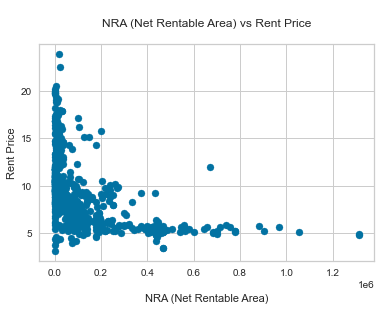

,NRA,lca_start_cash_rent_amt
NRA,1.000000,-0.464957
lca_start_cash_rent_amt,-0.464957,1.000000


In [10]:
### Since one important client ask is relationship between NRA and price, checking correlation between the two
### and plotting the two against each other.

plt.figure(figsize=(6,4))
plt.scatter(df.NRA, df.lca_start_cash_rent_amt)
plt.title("\nNRA (Net Rentable Area) vs Rent Price\n")
plt.xlabel("\nNRA (Net Rentable Area)")
plt.ylabel("Rent Price")
plt.show()

df[['NRA', 'lca_start_cash_rent_amt']].corr()

In [11]:
# 46% correlation. 
# They have inverse relationship

# Coefficients 

#### What is “Rate of price change” w.r.t NRA?

In [12]:
x = df['NRA']
y = df['lca_start_cash_rent_amt']

model = sm.OLS(y,sm.add_constant(x)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     lca_start_cash_rent_amt   R-squared:                       0.216
Model:                                 OLS   Adj. R-squared:                  0.215
Method:                      Least Squares   F-statistic:                     179.8
Date:                     Mon, 11 Apr 2022   Prob (F-statistic):           2.18e-36
Time:                             15:24:54   Log-Likelihood:                -1653.0
No. Observations:                      654   AIC:                             3310.
Df Residuals:                          652   BIC:                             3319.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.3385      0.137     75.586      0.000      10.070      10.607
NRA        -8.924e-06   6.65e-07    -13.410      0.000   -1.02e-05   -7.62e-06
==============================================================================
Omnibus:                      140.660   Durbin-Watson:                   1.605
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              269.633
Skew:                           1.228   Prob(JB):                     2.82e-59
Kurtosis:                       4.965   Cond. No.                     2.37e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Rate of price change  -> 0.0000089

#### If we term “Base Rent” as the rent at NRA=0, frame the equation in such a way that intercept corresponds to the “Base Rent”.  

y = base_rent + (b1*NRA)

#### Is the base price different between LA & Inland Empire?

In [14]:
df['market_name'].value_counts()

US-LA County        516
US-Inland Empire    138
Name: market_name, dtype: int64

In [15]:
df_la = df[df['market_name']== 'US-LA County']
df_ie = df[df['market_name']== 'US-Inland Empire']

In [16]:
x = df_la['NRA']
y = df_la['lca_start_cash_rent_amt']

model = sm.OLS(y,sm.add_constant(x)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     lca_start_cash_rent_amt   R-squared:                       0.058
Model:                                 OLS   Adj. R-squared:                  0.056
Method:                      Least Squares   F-statistic:                     31.68
Date:                     Mon, 11 Apr 2022   Prob (F-statistic):           3.00e-08
Time:                             15:39:43   Log-Likelihood:                -1316.0
No. Observations:                      516   AIC:                             2636.
Df Residuals:                          514   BIC:                             2644.
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.8375      0.158     68.450      0.000      10.526      11.149
NRA        -1.021e-05   1.81e-06     -5.628      0.000   -1.38e-05   -6.64e-06
==============================================================================
Omnibus:                       98.425   Durbin-Watson:                   1.733
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              170.486
Skew:                           1.130   Prob(JB):                     9.54e-38
Kurtosis:                       4.681   Cond. No.                     1.01e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
x = df_ie['NRA']
y = df_ie['lca_start_cash_rent_amt']

model = sm.OLS(y,sm.add_constant(x)).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     lca_start_cash_rent_amt   R-squared:                       0.276
Model:                                 OLS   Adj. R-squared:                  0.271
Method:                      Least Squares   F-statistic:                     51.88
Date:                     Mon, 11 Apr 2022   Prob (F-statistic):           3.65e-11
Time:                             15:39:55   Log-Likelihood:                -170.32
No. Observations:                      138   AIC:                             344.6
Df Residuals:                          136   BIC:                             350.5
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.4526      0.112     57.533      0.000       6.231       6.674
NRA         -1.95e-06   2.71e-07     -7.203      0.000   -2.48e-06   -1.41e-06
==============================================================================
Omnibus:                       18.540   Durbin-Watson:                   1.741
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.385
Skew:                           0.615   Prob(JB):                     5.63e-08
Kurtosis:                       5.072   Cond. No.                     6.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# Base rent of LA and IE are different
# RAte of LA and IE is also differnt.

#### If the rates of change are different, can you visually explain the changes? 

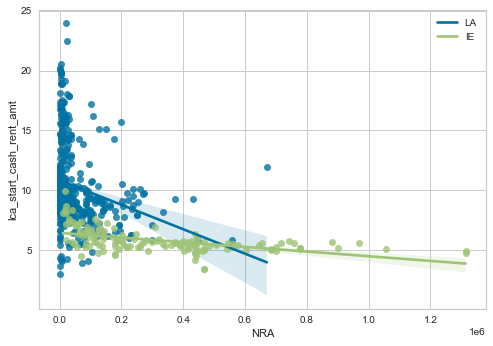

In [21]:
sns.regplot(df_la['NRA'],df_la['lca_start_cash_rent_amt'])
sns.regplot(df_ie['NRA'],df_ie['lca_start_cash_rent_amt'])
plt.legend(['LA','IE'])

#### Is the “Rate of price change” same across NRA range?

In [22]:
# Rate change of NRA is not same across the range

#### Is there an impact of amendment term on Pricing? 

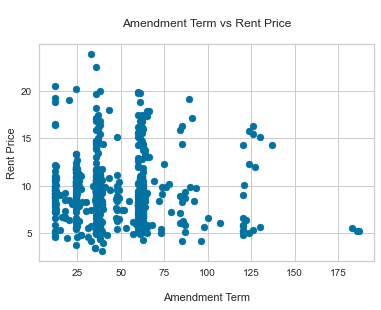

,amendment_term,lca_start_cash_rent_amt
amendment_term,1.000000,-0.057893
lca_start_cash_rent_amt,-0.057893,1.000000


In [23]:
### To understand relationship between amendment term and price, checking correlation between the two
### and plotting the two against each other.

plt.figure(figsize=(6,4))
plt.scatter(df.amendment_term, df.lca_start_cash_rent_amt)
plt.title("\nAmendment Term vs Rent Price\n")
plt.xlabel("\nAmendment Term")
plt.ylabel("Rent Price")
plt.show()

df[['amendment_term', 'lca_start_cash_rent_amt']].corr()

In [25]:
### The column amendment_term is being binned for explanatory purpose.

bins = [0.0, int(df['amendment_term'].max()/2), df['amendment_term'].max()]
df['amendment_term'] = pd.cut(df['amendment_term'], bins = bins, labels = ['one', 'two'], include_lowest = True)


In [26]:
df[['amendment_term','lca_start_cash_rent_amt']].groupby('amendment_term').agg(np.mean)

,lca_start_cash_rent_amt
amendment_term,
one,9.474827
two,8.340235


## Other Analysis

<AxesSubplot:xlabel='customer_category', ylabel='lca_start_cash_rent_amt'>

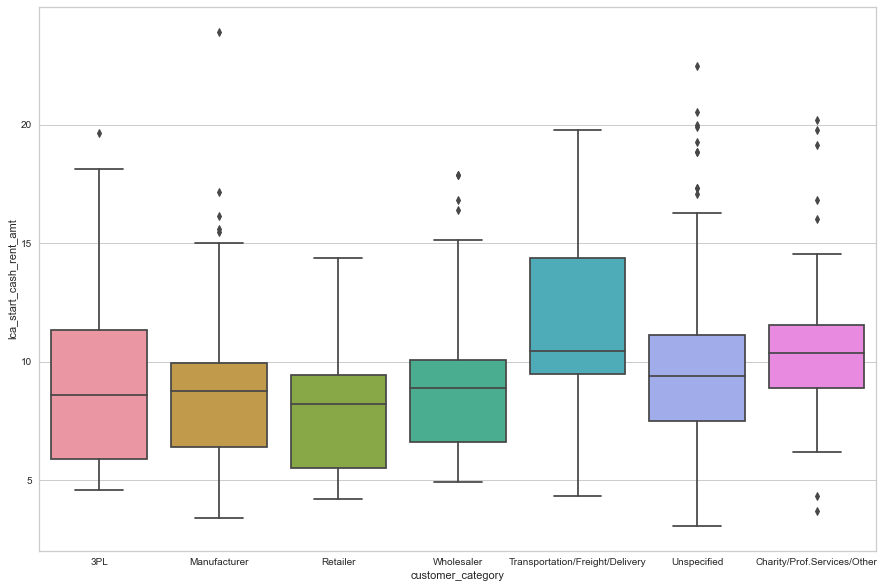

In [27]:
df['customer_category'].value_counts()
plt.figure(figsize=(15,10))
sns.boxplot(x='customer_category',y='lca_start_cash_rent_amt',data=df)

In [ ]:
# Transportation/Freight/Delivery has more rent_amnt comapred to other classes

# Have more number of classes does not make significant impact. Try to minimum no of classes

In [28]:
df[['lca_start_cash_rent_amt','property_type_land_area']].corr()

,lca_start_cash_rent_amt,property_type_land_area
lca_start_cash_rent_amt,1.000000,-0.041882
property_type_land_area,-0.041882,1.000000


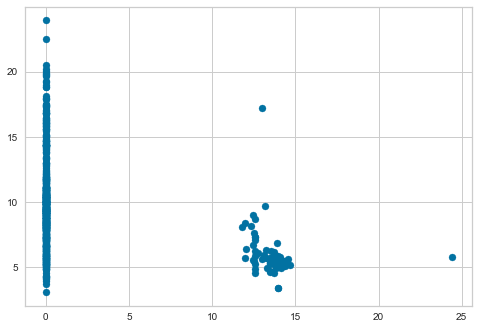

In [30]:
plt.scatter(np.log(df['property_type_land_area']+1),df['lca_start_cash_rent_amt'])

In [ ]:
# In terms of correlation, there is no signifcant impact.
# Creating bins will make some insights.

In [31]:
corr_df = df.corr()['lca_start_cash_rent_amt'].reset_index(name="corr_with_rent_amt").sort_values(by="corr_with_rent_amt")
corr_df

### It's clear from the correlation values below that the the NRA feature has moderately significant
### correlation with the target variable. Further, given the large number of features, some of them do not have any
### appreciable correlation, while others display multicollinearity.

,index,corr_with_rent_amt
23,prop_building_depth,-0.474345
42,avg_market_NRA_ratio,-0.464957
0,NRA,-0.464957
17,property_type_nra,-0.455817
22,property_type_bldbl_area,-0.451629
40,clearance_volume,-0.450745
12,prop_speed_bay_depth,-0.437013
13,prop_truck_court_depth,-0.407431
16,property_type_gross_area,-0.402754
15,prop_column_spacing2,-0.388875


In [32]:
categorical_cols = ['market_code', 'submarket_code', 'amendment_type_name', 'lease_type_code', 
 'trailer_park_flg', 'prop_trailer_park_flg', 'usage_type_descr']

In [33]:

### Removing datetime columns and segragating the numeric and categorical columns.
df = df.drop(columns = ['amendment_sign_dt', 'amendment_attr.amendment_start_dt'])
num_cols = list(df.select_dtypes([np.number]).columns)
num_cols.remove("lca_start_cash_rent_amt")

### Creating dummy variables for categorical columns
df_cat = pd.get_dummies(data = df[categorical_cols], columns = categorical_cols, drop_first = True)
dummy_cols = list(df_cat.columns)

### Merging the two back
df = pd.concat([df, df_cat], axis = 1)
df = df.drop(columns=categorical_cols)

In [34]:
### Train test Split. The split in this case is being done before PCA, so that PCA and skew analysis can be done
### for the training part separately.

X = df.drop(columns = "lca_start_cash_rent_amt")
y = df["lca_start_cash_rent_amt"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)


### Separating numeric columns and dummy variable columns so that PCA can be performed on the numeric columns
X_train_num = X_train[num_cols]
X_test_num = X_test[num_cols]

X_train_cat = X_train[dummy_cols]
X_test_cat = X_test[dummy_cols]

## Base Model

In [35]:
X_train = pd.concat([X_train_num, X_train_cat], axis=1)
X_test = pd.concat([X_test_num, X_test_cat], axis=1)


In [36]:
lin_reg = sm.OLS(y_train,sm.add_constant(X_train)).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     lca_start_cash_rent_amt   R-squared:                       0.709
Model:                                 OLS   Adj. R-squared:                  0.666
Method:                      Least Squares   F-statistic:                     16.51
Date:                     Mon, 11 Apr 2022   Prob (F-statistic):           8.44e-81
Time:                             15:53:29   Log-Likelihood:                -998.11
No. Observations:                      490   AIC:                             2124.
Df Residuals:                          426   BIC:                             2393.
Df Model:                               63                                         
Covariance Type:                 nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                              10.9081      1.661      6.567      0.000       7.643      14.173
NRA                                             -4.389e-06   5.32e-06     -0.825      0.410   -1.49e-05    6.07e-06
amendment_unit_cnt                                  0.1983      0.797      0.249      0.804      -1.368       1.765
TI                                               1.722e-06   4.92e-07      3.497      0.001    7.54e-07    2.69e-06
lca_wgt_prps_comm_amt                            3.165e-07    3.4e-06      0.093      0.926   -6.38e-06    7.01e-06
lca_procu_brkge_comm_amt                        -1.027e-06   3.86e-06     -0.266      0.790   -8.62e-06    6.56e-06
lca_list_broker_comm_amt                         2.852e-06   3.67e-06      0.777      0.438   -4.36e-06    1.01e-05
Free.Rent                                          -0.0044      0.015     -0.298      0.766      -0.033       0.025
prop_car_parking_spaces                            -0.0002      0.002     -0.125      0.901      -0.004       0.003
prop_trailer_parking_spaces                         0.0006      0.001      0.773      0.440      -0.001       0.002
prop_main_trans_kvasize                             0.0001      0.000      0.376      0.707      -0.000       0.001
prop_main_trans_amperage                        -1.778e-05      0.000     -0.161      0.872      -0.000       0.000
prop_speed_bay_depth                               -0.0041      0.010     -0.418      0.676      -0.023       0.015
prop_truck_court_depth                              0.0025      0.003      0.761      0.447      -0.004       0.009
prop_column_spacing1                               -0.0123      0.011     -1.095      0.274      -0.034       0.010
prop_column_spacing2                               -0.0194      0.008     -2.308      0.021      -0.036      -0.003
property_type_gross_area                        -1.509e-06    1.4e-06     -1.075      0.283   -4.27e-06    1.25e-06
property_type_nra                                5.921e-05      0.000      0.542      0.588      -0.000       0.000
property_type_footprint_area                     -2.69e-06   3.77e-06     -0.713      0.476   -1.01e-05    4.73e-06
property_type_non_stat_area                      8.914e-06   1.77e-05      0.503      0.615   -2.59e-05    4.37e-05
property_type_land_area                          4.458e-11   5.83e-11      0.765      0.445      -7e-11    1.59e-10
property_type_site_cvrge_area                   -7.222e-07   8.12e-07     -0.889      0.374   -2.32e-06    8.74e-07
property_type_bldbl_area                        -5.699e-05      0.000     -0.522      0.602      -0.000       0.000
prop_buildin

In [37]:
def performance(X_train,y_train, X_test,y_test):
    lin_reg = sm.OLS(y_train,sm.add_constant(X_train)).fit()
    y_train_pred =  lin_reg.predict(sm.add_constant(X_train))
    y_test_pred =  lin_reg.predict(sm.add_constant(X_test))
    print('Train R2',r2_score(y_train,y_train_pred))
    print('Test R2',r2_score(y_test,y_test_pred))
    print('-'*50)
    print('Train MAPE:', mean_absolute_percentage_error(y_train,y_train_pred))
    print('Test MAPE:', mean_absolute_percentage_error(y_test,y_test_pred))
    print('Cross Val Score of MAPE:')
    scores = -1*cross_val_score(LinearRegression(),X_train,y_train,cv=5,
                scoring='neg_mean_absolute_percentage_error')
    bias  = np.mean(scores)
    variance = np.std(scores,ddof=1)
    print('CV_scores:',scores)
    print('Bias :',bias)
    print('Variance:',variance)

In [38]:
performance(X_train,y_train, X_test,y_test)

Train R2 0.7094573009355281
Test R2 0.5873227003758048
--------------------------------------------------
Train MAPE: 0.15269828590395026
Test MAPE: 0.1687397709792411
Cross Val Score of MAPE:
CV_scores: [ 0.21352817  0.20558866  1.18947153 49.96053914  0.19407659]
Bias : 10.352640818189641
Variance: 22.14559764712998


<AxesSubplot:>

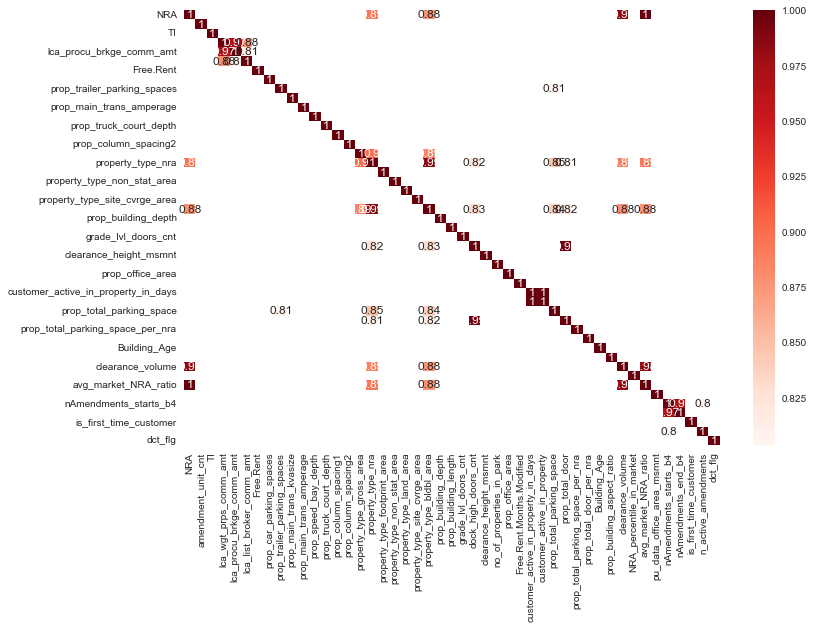

In [39]:
corr = df[num_cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr[corr>=.8], cmap="Reds",annot=True)

## VIF

In [40]:
ft=[]
vif_val = 10
x =X_train[num_cols]
collinear_ft = []
vif_max = 100
while vif_max>vif_val:
    x_vif = sm.add_constant(x.drop(columns=collinear_ft))
    vif = pd.DataFrame()
    vif['VIF']=[variance_inflation_factor(x_vif.values,i) for i in range(x_vif.shape[1])]
    vif['features']=x_vif.columns
    vif = vif.sort_values(by='VIF',ascending=False).reset_index(drop=True)
    if vif.loc[0,'features']!='const':
        vif_max = vif.loc[0,'VIF']
        collinear_ft.append(vif.loc[0,'features'])
    else:
        vif_max = vif.loc[1,'VIF']
        collinear_ft.append(vif.loc[1,'features'])
vif_feat = list(vif['features'])
vif_feat.remove('const')
print(vif_feat)

C:\Users\sachin.rajendran\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


['clearance_volume', 'prop_building_length', 'lca_procu_brkge_comm_amt', 'property_type_gross_area', 'dock_high_doors_cnt', 'prop_column_spacing1', 'prop_building_depth', 'prop_car_parking_spaces', 'lca_list_broker_comm_amt', 'prop_trailer_parking_spaces', 'prop_main_trans_kvasize', 'prop_main_trans_amperage', 'prop_building_aspect_ratio', 'prop_speed_bay_depth', 'clearance_height_msmnt', 'NRA_percentile_in_market', 'prop_truck_court_depth', 'prop_column_spacing2', 'grade_lvl_doors_cnt', 'nAmendments_end_b4', 'prop_total_parking_space_per_nra', 'Building_Age', 'prop_total_door_per_nra', 'n_active_amendments', 'TI', 'dct_flg', 'Free.Rent.Months.Modified', 'no_of_properties_in_park', 'property_type_footprint_area', 'is_first_time_customer', 'Free.Rent', 'customer_active_in_property_in_days', 'pu_data_office_area_msmnt', 'property_type_site_cvrge_area', 'prop_office_area', 'property_type_non_stat_area', 'property_type_land_area', 'amendment_unit_cnt']


In [41]:
X_train_num = X_train[vif_feat]
X_test_num = X_test[vif_feat]

X_train_cat = X_train[dummy_cols]
X_test_cat = X_test[dummy_cols]

In [42]:
X_train_vif = pd.concat([X_train_num, X_train_cat], axis=1)
X_test_vif = pd.concat([X_test_num, X_test_cat], axis=1)

In [43]:
lin_reg = sm.OLS(y_train,sm.add_constant(X_train_vif)).fit()
lin_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     lca_start_cash_rent_amt   R-squared:                       0.708
Model:                                 OLS   Adj. R-squared:                  0.668
Method:                      Least Squares   F-statistic:                     17.70
Date:                     Mon, 11 Apr 2022   Prob (F-statistic):           5.84e-83
Time:                             15:55:51   Log-Likelihood:                -999.01
No. Observations:                      490   AIC:                             2118.
Df Residuals:                          430   BIC:                             2370.
Df Model:                               59                                         
Covariance Type:                 nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
const                                              10.6504      1.635      6.514      0.000       7.437      13.864
clearance_volume                                -9.884e-08   4.98e-08     -1.986      0.048   -1.97e-07   -9.99e-10
prop_building_length                               -0.0020      0.001     -3.008      0.003      -0.003      -0.001
lca_procu_brkge_comm_amt                        -9.675e-07   1.53e-06     -0.633      0.527   -3.97e-06    2.04e-06
property_type_gross_area                         -1.15e-06   1.33e-06     -0.865      0.388   -3.76e-06    1.46e-06
dock_high_doors_cnt                                 0.0103      0.006      1.848      0.065      -0.001       0.021
prop_column_spacing1                               -0.0142      0.011     -1.288      0.198      -0.036       0.007
prop_building_depth                                -0.0006      0.001     -0.489      0.625      -0.003       0.002
prop_car_parking_spaces                             0.0004      0.002      0.200      0.842      -0.003       0.004
lca_list_broker_comm_amt                         3.707e-06   2.27e-06      1.636      0.103   -7.47e-07    8.16e-06
prop_trailer_parking_spaces                         0.0020      0.004      0.505      0.614      -0.006       0.010
prop_main_trans_kvasize                             0.0002      0.000      0.570      0.569      -0.000       0.001
prop_main_trans_amperage                        -3.774e-05      0.000     -0.347      0.729      -0.000       0.000
prop_building_aspect_ratio                          0.2058      0.096      2.135      0.033       0.016       0.395
prop_speed_bay_depth                               -0.0031      0.010     -0.318      0.751      -0.022       0.016
clearance_height_msmnt                             -0.0839      0.025     -3.322      0.001      -0.133      -0.034
NRA_percentile_in_market                            0.8505      1.017      0.837      0.403      -1.148       2.849
prop_truck_court_depth                              0.0026      0.003      0.808      0.420      -0.004       0.009
prop_column_spacing2                               -0.0192      0.008     -2.301      0.022      -0.036      -0.003
grade_lvl_doors_cnt                                 0.0095      0.045      0.210      0.834      -0.079       0.098
nAmendments_end_b4                                  0.0365      0.029      1.249      0.212      -0.021       0.094
prop_total_parking_space_per_nra                 -151.8512    144.457     -1.051      0.294    -435.782     132.079
Building_Age                                       -0.0699      0.011     -6.261      0.000      -0.092      -0.048
prop_total_d

<AxesSubplot:>

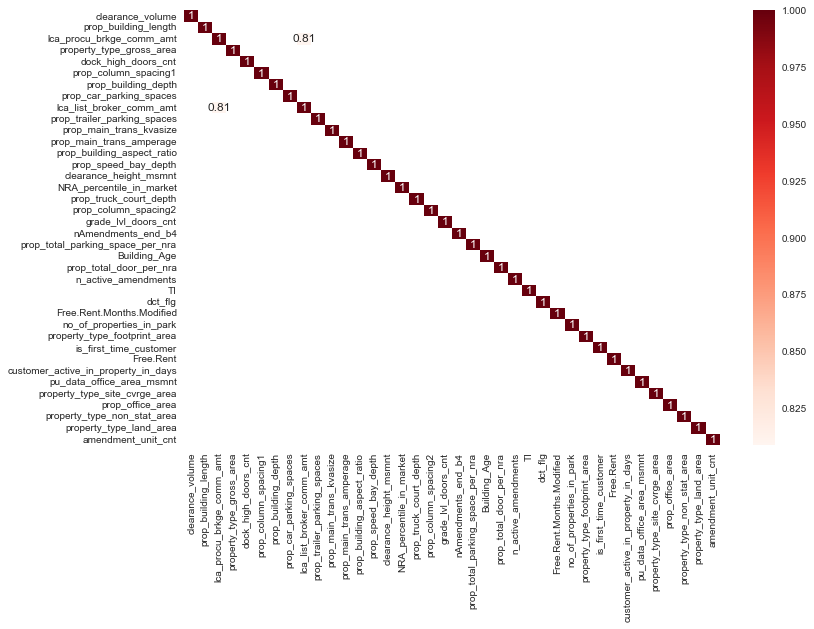

In [44]:
corr = df[vif_feat].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr[corr>=.8], cmap="Reds",annot=True)

In [45]:
performance(X_train_vif,y_train, X_test_vif,y_test)

Train R2 0.7083815667344711
Test R2 0.5933101901576842
--------------------------------------------------
Train MAPE: 0.15238442440731179
Test MAPE: 0.16685178534410483
Cross Val Score of MAPE:
CV_scores: [ 0.20941456  0.20049714  0.18416474 64.05591081  0.19064863]
Bias : 12.968127177170638
Variance: 28.558940872161436


## Feature Selection

In [46]:
back_ele_features = X_train_vif.columns.tolist()
while(len(back_ele_features)>0):
    features_with_constant = sm.add_constant(X_train_vif[back_ele_features])
    p_values = sm.OLS(y_train, features_with_constant).fit().pvalues[1:]
    max_p_value = p_values.max()
    if(max_p_value >= 0.05):
        excluded_feature = p_values.idxmax()
        back_ele_features.remove(excluded_feature)
    else:
        break 
print(back_ele_features)

['clearance_volume', 'prop_building_length', 'dock_high_doors_cnt', 'prop_column_spacing1', 'lca_list_broker_comm_amt', 'prop_building_aspect_ratio', 'clearance_height_msmnt', 'prop_column_spacing2', 'Building_Age', 'TI', 'Free.Rent.Months.Modified', 'prop_office_area', 'market_code_US_LA_COUNTY', 'submarket_code_INE_INLAND_EMPIRE', 'submarket_code_INE_INLAND_EMP_WEST', 'submarket_code_LAX_AIRPORT', 'submarket_code_LAX_INDUSTRY', 'submarket_code_LAX_MID_COUNTIES', 'lease_type_code_nnnpm', 'lease_type_code_pldclear', 'usage_type_descr_Other']


In [47]:
lin_reg_be = sm.OLS(y_train,sm.add_constant(X_train_vif[back_ele_features])).fit()
lin_reg_be.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     lca_start_cash_rent_amt   R-squared:                       0.688
Model:                                 OLS   Adj. R-squared:                  0.674
Method:                      Least Squares   F-statistic:                     49.07
Date:                     Mon, 11 Apr 2022   Prob (F-statistic):          5.50e-104
Time:                             15:56:29   Log-Likelihood:                -1015.8
No. Observations:                      490   AIC:                             2076.
Df Residuals:                          468   BIC:                             2168.
Df Model:                               21                                         
Covariance Type:                 nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 10.8827      0.691     15.752      0.000       9.525      12.240
clearance_volume                   -1.042e-07   3.79e-08     -2.748      0.006   -1.79e-07   -2.97e-08
prop_building_length                  -0.0023      0.000     -5.149      0.000      -0.003      -0.001
dock_high_doors_cnt                    0.0121      0.004      3.012      0.003       0.004       0.020
prop_column_spacing1                  -0.0236      0.006     -3.718      0.000      -0.036      -0.011
lca_list_broker_comm_amt            3.749e-06   1.54e-06      2.431      0.015    7.19e-07    6.78e-06
prop_building_aspect_ratio             0.2359      0.062      3.827      0.000       0.115       0.357
clearance_height_msmnt                -0.0753      0.021     -3.668      0.000      -0.116      -0.035
prop_column_spacing2                  -0.0177      0.006     -2.946      0.003      -0.030      -0.006
Building_Age                          -0.0686      0.009     -7.683      0.000      -0.086      -0.051
TI                                  1.463e-06    4.3e-07      3.406      0.001    6.19e-07    2.31e-06
Free.Rent.Months.Modified             -0.1905      0.059     -3.223      0.001      -0.307      -0.074
prop_office_area                   -9.619e-05   2.84e-05     -3.393      0.001      -0.000   -4.05e-05
market_code_US_LA_COUNTY               3.9604      0.537      7.376      0.000       2.905       5.016
submarket_code_INE_INLAND_EMPIRE       7.0082      2.586      2.710      0.007       1.926      12.090
submarket_code_INE_INLAND_EMP_WEST     1.1069      0.494      2.241      0.025       0.136       2.078
submarket_code_LAX_AIRPORT             3.5146      0.321     10.963      0.000       2.885       4.145
submarket_code_LAX_INDUSTRY           -1.6404      0.741     -2.212      0.027      -3.097      -0.183
submarket_code_LAX_MID_COUNTIES       -1.1308      0.271     -4.176      0.000      -1.663      -0.599
lease_type_code_nnnpm                  1.3019      0.233      5.584      0.000       0.844       1.760
lease_type_code_pldclear               0.7573      0.281      2.692      0.007       0.204       1.310
usage_type_descr_Other                17.5266      2.025      8.656      0.000      13.548      21.506
==============================================================================
Omnibus:                       77.550   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              360.039
Skew:                           0.596   Prob(JB):                     6.58e-79
Kurtosis:                       7.027   Cond. No.                     1.75e+08
==========================================================

In [49]:
performance(X_train_vif[back_ele_features],y_train, X_test_vif[back_ele_features],y_test)

Train R2 0.6876917843343943
Test R2 0.5921942114202068
--------------------------------------------------
Train MAPE: 0.15812766568407247
Test MAPE: 0.16640796838521232
Cross Val Score of MAPE:
CV_scores: [0.20606437 0.17659456 0.16988585 0.14468598 0.15552564]
Bias : 0.1705512782449397
Variance: 0.023414348626875126


In [ ]:
corr = df[back_ele_features].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr[corr>=.8], cmap="Reds",annot=True)

## Manual Selection

In [50]:
man_fet = back_ele_features+['NRA']
man_fet.remove('clearance_volume')

In [51]:
lin_reg_man = sm.OLS(y_train,sm.add_constant(X_train[man_fet])).fit()
lin_reg_man.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     lca_start_cash_rent_amt   R-squared:                       0.687
Model:                                 OLS   Adj. R-squared:                  0.673
Method:                      Least Squares   F-statistic:                     49.00
Date:                     Mon, 11 Apr 2022   Prob (F-statistic):          6.86e-104
Time:                             16:04:12   Log-Likelihood:                -1016.0
No. Observations:                      490   AIC:                             2076.
Df Residuals:                          468   BIC:                             2168.
Df Model:                               21                                         
Covariance Type:                 nonrobust                                         
======================================================================================================
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
const                                 10.9288      0.695     15.715      0.000       9.562      12.295
prop_building_length                  -0.0022      0.000     -4.888      0.000      -0.003      -0.001
dock_high_doors_cnt                    0.0114      0.004      2.907      0.004       0.004       0.019
prop_column_spacing1                  -0.0232      0.006     -3.665      0.000      -0.036      -0.011
lca_list_broker_comm_amt            3.521e-06   1.53e-06      2.300      0.022    5.13e-07    6.53e-06
prop_building_aspect_ratio             0.2288      0.063      3.635      0.000       0.105       0.352
clearance_height_msmnt                -0.0799      0.020     -3.914      0.000      -0.120      -0.040
prop_column_spacing2                  -0.0166      0.006     -2.741      0.006      -0.029      -0.005
Building_Age                          -0.0680      0.009     -7.634      0.000      -0.085      -0.050
TI                                  1.511e-06   4.32e-07      3.497      0.001    6.62e-07    2.36e-06
Free.Rent.Months.Modified             -0.1887      0.059     -3.194      0.002      -0.305      -0.073
prop_office_area                   -9.409e-05   2.84e-05     -3.316      0.001      -0.000   -3.83e-05
market_code_US_LA_COUNTY               3.9343      0.539      7.296      0.000       2.875       4.994
submarket_code_INE_INLAND_EMPIRE       7.5038      2.593      2.894      0.004       2.409      12.598
submarket_code_INE_INLAND_EMP_WEST     1.0603      0.495      2.141      0.033       0.087       2.034
submarket_code_LAX_AIRPORT             3.5322      0.320     11.038      0.000       2.903       4.161
submarket_code_LAX_INDUSTRY           -1.6332      0.742     -2.201      0.028      -3.092      -0.175
submarket_code_LAX_MID_COUNTIES       -1.1137      0.271     -4.107      0.000      -1.647      -0.581
lease_type_code_nnnpm                  1.3338      0.234      5.705      0.000       0.874       1.793
lease_type_code_pldclear               0.7712      0.282      2.736      0.006       0.217       1.325
usage_type_descr_Other                17.5341      2.026      8.653      0.000      13.552      21.516
NRA                                -3.077e-06   1.16e-06     -2.664      0.008   -5.35e-06   -8.07e-07
==============================================================================
Omnibus:                       77.970   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              364.809
Skew:                           0.597   Prob(JB):                     6.06e-80
Kurtosis:                       7.055   Cond. No.                     9.54e+06
==========================================================

In [52]:
performance(X_train[man_fet],y_train, X_test[man_fet],y_test)

Train R2 0.6873914181733313
Test R2 0.5890218072172215
--------------------------------------------------
Train MAPE: 0.15803439032962208
Test MAPE: 0.1676458302952076
Cross Val Score of MAPE:
CV_scores: [0.20518869 0.17712712 0.17043872 0.14313277 0.15623361]
Bias : 0.1704241822616811
Variance: 0.023450446508258695


<AxesSubplot:>

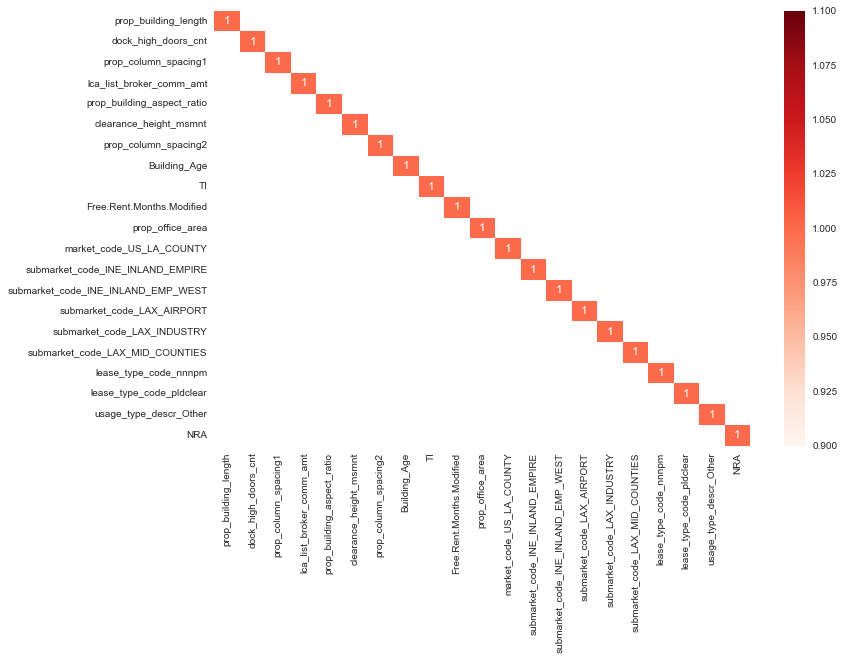

In [53]:
corr = df[man_fet].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr[corr>=.8], cmap="Reds",annot=True)

In [55]:
from sklearn.metrics import mean_absolute_error

In [56]:
### A simple random forest to see the results difference

rf = RandomForestRegressor()
grid_list = {'max_depth':[10, 15, 50, 100], 'bootstrap': [False, True], 
             'min_samples_leaf': [2, 4], 'min_samples_split': [5, 10],
             'n_estimators':[25, 50, 100], 'max_features': [0.5]}

rf_grid_search = GridSearchCV(estimator = rf, param_grid = grid_list, cv = 5, n_jobs = 4)
rf_grid_search.fit(X_train, y_train)

print(rf_grid_search.best_params_)
print(rf_grid_search.best_score_)
rf_best_model = rf_grid_search.best_estimator_

### Predicting and checking accuracy
y_train_pred = rf_best_model.predict(X_train)

print("-----------------------------------------------------")
print("Training")
print('RMSE: ' + str(np.sqrt(mean_squared_error(y_train, y_train_pred))))
print('MAE: ' + str(mean_absolute_error(y_train, y_train_pred)))
print('R-squared: ' + str(r2_score(y_train, y_train_pred)))
print("\n")

y_test_pred = rf_best_model.predict(X_test)

print("Testing")
print('RMSE: ' + str(np.sqrt(mean_squared_error(y_test, y_test_pred)))) 
print('MAE: ' + str(mean_absolute_error(y_test, y_test_pred)))
print('R-squared: ' + str(r2_score(y_test, y_test_pred)))

{'bootstrap': True, 'max_depth': 50, 'max_features': 0.5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
0.6208477287297854
-----------------------------------------------------
Training
RMSE: 1.0839190475145741
MAE: 0.6141626125083951
R-squared: 0.9008246915112259


Testing
RMSE: 1.9196407332331151
MAE: 1.1265883956192684
R-squared: 0.6740064454041115
